# Building a Spam Filter using Naive Bayes

The goal of this project is to build a spam filter software for SMS messages using a dataset of 5572 SMS messages that have already been categorized as spam or ham(non-spam). The dataset was obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection). Our ideal spam filter will have an accuracy of greater than 80%.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
plt.style.use('fivethirtyeight')

In [19]:
sms_collection = pd.read_csv('Data\SMSSpamCollection', sep='\t', header=None, names=['Label', 'SMS'])

In [20]:
display(sms_collection.head())
print('The dataset contains {} messages.' .format(sms_collection.shape[0]))
print('The percentage of non-spam (ham) vs spam messages are - ')
print(sms_collection['Label'].value_counts(normalize=True))

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


The dataset contains 5572 messages.
The percentage of non-spam (ham) vs spam messages are - 
ham     0.865937
spam    0.134063
Name: Label, dtype: float64


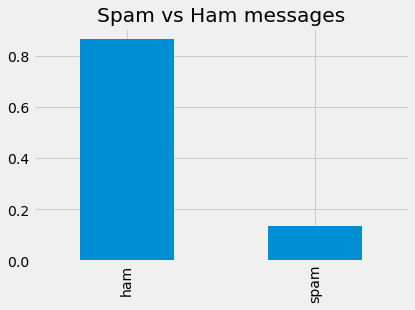

In [63]:
sms_collection['Label'].value_counts(normalize=True).plot(kind='bar', title='Spam vs Ham messages')
plt.savefig('Spam vs Ham in dataset.png', bbox_inches='tight')

We will randomly divide the dataset into training(80%) and test modules.

In [29]:
sms_collection = sms_collection.sample(random_state=1, frac=1)
train = sms_collection.iloc[:4458]
test = sms_collection.iloc[4458:]

In [30]:
display(train.head())
display(test.head())

,Label,SMS
1078,ham,"Yep, by the pretty sculpture"
4028,ham,"Yes, princess. Are you going to make me moan?"
958,ham,Welp apparently he retired
4642,ham,Havent.
4674,ham,I forgot 2 ask ü all smth.. There's a card on ...


,Label,SMS
2131,ham,Later i guess. I needa do mcat study too.
3418,ham,But i haf enuff space got like 4 mb...
3424,spam,Had your mobile 10 mths? Update to latest Oran...
1538,ham,All sounds good. Fingers . Makes it difficult ...
5393,ham,"All done, all handed in. Don't know if mega sh..."


In [33]:
display(train['Label'].value_counts(normalize=True))
display(test['Label'].value_counts(normalize=True))

ham     0.86541
spam    0.13459
Name: Label, dtype: float64

ham     0.868043
spam    0.131957
Name: Label, dtype: float64

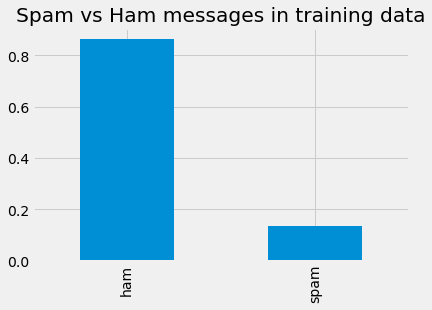

In [64]:
train['Label'].value_counts(normalize=True).plot(kind='bar', title='Spam vs Ham messages in training data')
plt.savefig('Spam vs Ham in train data.png', bbox_inches='tight')

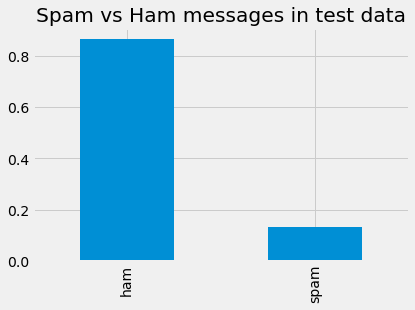

In [65]:
test['Label'].value_counts(normalize=True).plot(kind='bar', title='Spam vs Ham messages in test data')
plt.savefig('Spam vs Ham in test data.png', bbox_inches='tight')

Train and test datasets have been created with similar percentages of ham and spam labels. 

## Data Cleaning

We will remove all the punctuations from the columns and convert all characters to lower case. This can be done on sms_collection dataframe as train and test are copies of the original df. 

In [41]:
train['SMS'] = train['SMS'].replace(to_replace='\W', value=' ', regex=True)
train['SMS'] = train['SMS'].str.lower()

/Users/neha/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/neha/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
display(train.head())

,Label,SMS
1078,ham,yep by the pretty sculpture
4028,ham,yes princess are you going to make me moan
958,ham,welp apparently he retired
4642,ham,havent
4674,ham,i forgot 2 ask ü all smth there s a card on ...


In [43]:
train['SMS'] = train['SMS'].str.split()
vocabulary = []
for i in train['SMS']:
    for j in i:
        vocabulary.append(j)
        
vocabulary = set(vocabulary) #to remove any duplicated terms
vocabulary = list(vocabulary) #convert back to list
vocabulary

/Users/neha/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


['ü',
 'barbie',
 'bills',
 'bthere',
 'hiphop',
 'absolutely',
 'adrink',
 'amused',
 'worth',
 'num',
 'the',
 'advance',
 'lets',
 'prices',
 'writhing',
 'confuses',
 'innu',
 'hp',
 'peril',
 '5years',
 'merememberin',
 '8p',
 'ic',
 'weirdo',
 '08718725756',
 'argue',
 'blind',
 'ikea',
 'attend',
 'opted',
 'erm',
 'values',
 'statement',
 'agidhane',
 'pansy',
 'tonight',
 'dinero',
 'mmmmmm',
 'tech',
 'awarded',
 'cruisin',
 '2814032',
 'weekends',
 '85',
 'gossip',
 'prizeawaiting',
 'yijue',
 'sphosting',
 'cs',
 'dysentry',
 'mokka',
 'from',
 'harri',
 'stopcs',
 'linear',
 'claim',
 'pin',
 'brolly',
 'cut',
 'stay',
 'cuppa',
 'w8in',
 'delicious',
 'paranoid',
 'means',
 'fones',
 '700',
 'cook',
 'fr',
 'roller',
 'culdnt',
 'legitimat',
 'fond',
 'available',
 'musthu',
 'myspace',
 '2mro',
 'crowd',
 'slurp',
 'nahi',
 'neighbors',
 'rcb',
 'novelty',
 'punto',
 '9758',
 'reached',
 'm39m51',
 '373',
 'dot',
 'kittum',
 'rents',
 'swing',
 'best1',
 'deliver',
 'gd'

In [44]:
word_count_per_sms = {}
for unique_word in vocabulary:
    word_count_per_sms[unique_word] = [0] * len(train)
train = train.reset_index(drop=True)
for index, msg in enumerate(train['SMS']):
    for word in msg:
        word_count_per_sms[word][index] += 1  

In [45]:
word_counts = pd.DataFrame(word_count_per_sms)
word_counts.sample(5)

,ü,barbie,bills,bthere,hiphop,absolutely,adrink,amused,worth,num,...,oble,genuine,establish,musicnews,mobilesdirect,salon,true18,wn,fish,hit
4291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#concatenate word_count dataframe with training dataframe
train_set_clean = pd.concat([train, word_counts], axis=1)

In [47]:
display(train_set_clean.sample(5))

,Label,SMS,ü,barbie,bills,bthere,hiphop,absolutely,adrink,amused,...,oble,genuine,establish,musicnews,mobilesdirect,salon,true18,wn,fish,hit
2846,ham,"[today, is, accept, day, u, accept, me, as, br...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,ham,"[yo, do, you, know, anyone, lt, gt, or, otherw...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2219,ham,"[how, much, are, we, getting]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4445,ham,"[haha, yeah, i, see, that, now, be, there, in,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3906,ham,"[what, happened, in, interview]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Probability calculations

We'll first start by calculating common probabilities - p_spam and p_ham. We will also calculate n_ham(number of words in all ham messages), n_spam and n_vocabulary. These terms are common in all probability equations. We will also initiate the smoothing filter to 1.

In [48]:
ham_df = train_set_clean[train_set_clean['Label'] == 'ham']
spam_df = train_set_clean[train_set_clean['Label'] == 'spam']
p_ham = len(ham_df) / len(train_set_clean)
p_spam = len(spam_df) / len(train_set_clean)
print('p_ham = {}' .format(p_ham))
print('p_spam = {}' .format(p_spam))

p_ham = 0.8654104979811574
p_spam = 0.13458950201884254


In [49]:
n_ham = 0
for row in ham_df['SMS']:
    n_ham += len(row)
    
n_spam = 0
for row in spam_df['SMS']:
    n_spam += len(row)
n_vocabulary = len(vocabulary) 
alpha = 1
print('n_ham = {}' .format(n_ham))
print('n_spam = {}' .format(n_spam))
print('n_vocabulary = {}' .format(n_vocabulary))

n_ham = 57237
n_spam = 15190
n_vocabulary = 7783


In [50]:
#initialize probabilities
p_word_given_spam = {}
p_word_given_ham = {}
for word in vocabulary:
    p_word_given_ham[word] = 0
    p_word_given_spam[word] = 0

In [51]:
for word in vocabulary:
    ham_word = 0
    spam_word = 0
    for sms in ham_df['SMS']:
        ham_word += sum([i == word for i in sms])
    p_word_given_ham[word] = (ham_word + alpha) / (n_ham + alpha*n_vocabulary)
    for sms in spam_df['SMS']:
        spam_word += sum([i == word for i in sms])
    p_word_given_spam[word] = (spam_word + alpha) / (n_spam + alpha*n_vocabulary)
        

In [52]:
p_word_given_ham['forgot']

0.00039987696093509687

We have calculated all the probabilities associated with Naive Bayes Theorem. Now we will write a function to classify any incoming new message as spam or ham.

In [53]:
import re
def classify(message):
    message = re.sub('\W', ' ', message)
    message = message.lower()
    message = message.split()
    #print(message)
    #initiale probabilities
    p_spam_given_message = p_spam
    p_ham_given_message = p_ham
    #print(p_spam_given_message)
    #print(p_ham_given_message)
    
    #loop through the message and multiply probabilities of each word
    for word in message:
        if word in vocabulary:
            p_spam_given_message *= p_word_given_spam[word]
            p_ham_given_message *= p_word_given_ham[word]
    print(p_spam_given_message)
    print(p_ham_given_message)
    if p_spam_given_message > p_ham_given_message:
        print('Label: Spam')
    elif p_ham_given_message > p_spam_given_message:
        print('Label: Ham')
    else:
        print('Equal probabilities, have a human classify this!')
    return




In [54]:
classify('Sounds, good, Neha. See u there - Adarsh')

6.43136700206982e-18
2.824167598198773e-14
Label: Ham


In [55]:
classify('WINNER!! This is the secret code to unlock the money: C3421')

1.3481290211300841e-25
1.9368049028589875e-27
Label: Spam


After testing the classify function on two example messages, we will test the accuracy of the spam filter by testing it on the test set. We will modify the classify function to return the label instead of printing which we will save in a new column in our test set.

In [56]:
def classify_test_set(message):
    message = re.sub('\W', ' ', message)
    message = message.lower()
    message = message.split()
    #print(message)
    #initiale probabilities
    p_spam_given_message = p_spam
    p_ham_given_message = p_ham
    #print(p_spam_given_message)
    #print(p_ham_given_message)
    
    #loop through the message and multiply probabilities of each word
    for word in message:
        if word in vocabulary:
            p_spam_given_message *= p_word_given_spam[word]
            p_ham_given_message *= p_word_given_ham[word]
    #print(p_spam_given_message)
    #print(p_ham_given_message)
    if p_spam_given_message > p_ham_given_message:
        classification = 'spam'
    elif p_ham_given_message > p_spam_given_message:
        classification = 'ham'
    else:
        classification = 'Equal probabilities, have a human classify this!'
    return classification

In [57]:
test['predicted'] = test['SMS'].apply(classify_test_set)
display(test.head())

/Users/neha/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Label,SMS,predicted
2131,ham,Later i guess. I needa do mcat study too.,ham
3418,ham,But i haf enuff space got like 4 mb...,ham
3424,spam,Had your mobile 10 mths? Update to latest Oran...,spam
1538,ham,All sounds good. Fingers . Makes it difficult ...,ham
5393,ham,"All done, all handed in. Don't know if mega sh...",ham


We will now measure the accuracy of our spam filter, where -

\begin{equation}
Accuracy = \frac {number\ of\ correctly\ classified\ messages}{total\ number\ of\ classified\ messages}
\end{equation}




In [58]:
correct = sum(test['Label'] == test['predicted']) 
total = len(test)
accuracy = correct / total
display(accuracy*100)

98.74326750448833

In [59]:
print('The accuracy of our Naive Bayes spam filter is {:3f}%' .format(accuracy*100))

The accuracy of our Naive Bayes spam filter is 98.743268%


In [60]:
test[test['Label'] != test['predicted']]

,Label,SMS,predicted
3460,spam,Not heard from U4 a while. Call me now am here...,ham
1940,spam,More people are dogging in your area now. Call...,ham
3890,ham,Unlimited texts. Limited minutes.,spam
991,ham,26th OF JULY,spam
4862,ham,Nokia phone is lovly..,spam
2370,ham,A Boy loved a gal. He propsd bt she didnt mind...,"Equal probabilities, have a human classify this!"
326,ham,No calls..messages..missed calls,spam
5046,ham,We have sent JD for Customer Service cum Accou...,spam
3864,spam,Oh my god! I've found your number again! I'm s...,ham
4676,spam,"Hi babe its Chloe, how r u? I was smashed on s...",ham
